### What is the fastest growing programming language from 2016 until 2019?

Now we can continue to find the insight about what is fastest growing language.
The library we will using is still same as the first question
The difference is from the data we will need several years data to know the growth per language and instead of bar chart growth easier to understand if presented in the form of lines.

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read stackoverflow survey data from 2016 - 2019

df_2016 = pd.read_csv("./input/2016 Stack Overflow Survey Responses.csv")
df_2017 = pd.read_csv("./input/2017 Survey Result.csv")
df_2018 = pd.read_csv("./input/2018 Survey Result.csv")
df_2019 = pd.read_csv("./input/2019 Survey Result.csv")

/home/jupyter/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# We only need information of the language that respondent worked with

df_2016_lang = df_2016[['Unnamed: 0','tech_do']]
df_2017_lang = df_2017[['Respondent','HaveWorkedLanguage']]
df_2018_lang = df_2018[['Respondent','LanguageWorkedWith']]
df_2019_lang = df_2019[['Respondent','LanguageWorkedWith']]

In [4]:
# Before column name standardization
df_2016_lang.head()

,Unnamed: 0,tech_do
0,1888,NaN
1,4637,iOS; Objective-C
2,11164,NaN
3,21378,NaN
4,30280,NaN


Looking at the DataFrames above, the column name is not standardize.
Before moving further let's standardize the column names of each dataframe to facilitate further analysis.

In [5]:
# Standardize the column name by renaming first column into 'Respondent' and second column into 'LanguageWorkedWith'

dfs = [df_2016_lang, df_2017_lang, df_2018_lang, df_2019_lang]
for df in dfs:
    df.rename(columns={df.columns[0]:'Respondent'}, inplace=True)
    df.rename(columns={df.columns[1]:'LanguageWorkedWith'}, inplace=True)

/home/jupyter/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [6]:
# After column name standardization
df_2016_lang.head()

,Respondent,LanguageWorkedWith
0,1888,NaN
1,4637,iOS; Objective-C
2,11164,NaN
3,21378,NaN
4,30280,NaN


In [7]:
def splitter(values):
    '''
    Description : split grouping values using semicolon (;) separator
    
    INPUT:
    values - each row in a dataframe
    
    OUTPUT:
    list - list that containing items (language) that have been split
    
    '''
    return list(itertools.product( *[str(v).split(';') for v in values]))

def expand(df):
    
    '''
    INPUT:
    df - a dataframe that contains grouping values inside a column/columns that needs to be splitted
    
    OUTPUT: 
    a fresh rebuild dataframe
    
    '''
    tuples=list()
    for i,row in df.iterrows():
        tuples.extend(splitter(row))
    return  pd.DataFrame.from_records(tuples,columns=df.columns)

In [8]:
def data_cleaning(df_input):
    '''
    Description : This function is used to clean the dataframe values. 
    The cleaning process including delete the null values, split grouping values, and delete undesirable whitespaces.
    Deleting null values is chosen instead of filling the null because 
    we want to see growth not predict which is what is needed is real data
    
    INPUT:
    df_input - the pandas dataframe you want to clean 
    
    OUTPUT:
    df - a clean dataframe

    '''
    
    df = df_input[df_input['LanguageWorkedWith'].notnull()]
    df['TotalRows'] = df.shape[0]
    df = expand(df) 
    df['LanguageWorkedWith'] = df['LanguageWorkedWith'].str.strip()
    return df

In [9]:
years = ['2016','2017','2018','2019']
dfs = [df_2016_lang, df_2017_lang, df_2018_lang, df_2019_lang]

df_blank = []
def data_processing(years,dfs):
    '''
    Description : This function is used to count percentage of users per language
    We only take top 7 language to see the growth because too many language will end in a messy visualization
    
    INPUT: 
    df_input - a dataframe you want to calculate the percentage of user language
    
    OUTPUT:
    df - a combined dataframes from each year that are ready for visualization
    
    '''
    
    for i, year in enumerate(years):
        df_input = dfs[i]
        df_clean = data_cleaning(df_input)
        total_respondent = pd.to_numeric(df_clean['TotalRows'].iloc[0])
        df_new = pd.DataFrame(df_clean['LanguageWorkedWith'].value_counts().reset_index())
        df_new.rename(columns={'index':'LanguageWorkedWith','LanguageWorkedWith':'count'}, inplace=True)
        df_new['perc'] = (df_new['count']/total_respondent)*100
        df_new = df_new.sort_values('count', ascending=False)
        df_new = df_new[:7] 
        df_new['Year'] = year
        df_new.drop(columns='count', inplace=True)
        df_blank.append(df_new) 
    all_years = pd.concat(df_blank)
    return all_years

In [10]:
growth_lang = data_processing(years,dfs)

/home/jupyter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# a Dataframe ready to be plotted 
growth_lang.head()

,LanguageWorkedWith,perc,Year
0,JavaScript,55.859255,2016
1,SQL,44.826109,2016
2,Java,36.597654,2016
3,C#,31.173891,2016
4,PHP,26.068332,2016


In [12]:
def plot_line(df,x_axis,y_axis,variant):
    '''
    INPUT:
    df - a dataframe contains x, y, and variant of metrics 
    x_axis - column name that will be the index or x_axis
    y_axis - column name that will be the values we want to see in this case percentage
    variant - in this case variant of LanguageWorkedWith : JavaScript, Python, PHP, etc)
    '''
    df_pvt = df.pivot(index=x_axis, columns=variant, values=y_axis)
    df_pvt.plot() 
    plt.gcf().set_size_inches(20, 10)
    plt.legend(loc=2, prop={'size': 20})
    plt.title('Fastest Growing Language 2016 - 2019', fontsize=30)

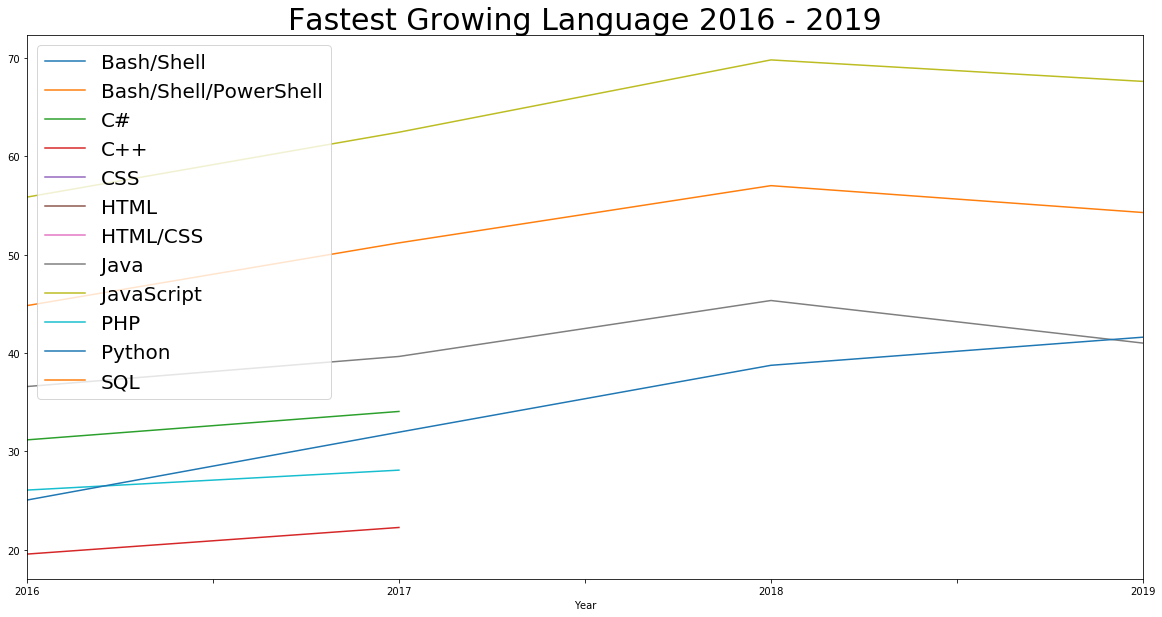

In [13]:
plot_line(growth_lang,'Year','perc','LanguageWorkedWith' )

### Users of Python in 2019

In [14]:
# Now we need to know which developer are using Python
df_2019_lang_user = df_2019[['Respondent','LanguageWorkedWith','DevType']]
df_2019_lang_user = df_2019_lang_user[df_2019_lang_user['DevType'].notnull()]
df_2019_lang_user = expand(df_2019_lang_user)

In [15]:
# Calculate total user per language
df_2019_lang_user = df_2019_lang_user.groupby(['LanguageWorkedWith','DevType']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)

In [16]:
# Show total user for python
df_2019_lang_user[df_2019_lang_user['LanguageWorkedWith']=='Python'][:10]

,LanguageWorkedWith,DevType,count
439,Python,"Developer, back-end",16537
443,Python,"Developer, full-stack",15406
442,Python,"Developer, front-end",8442
454,Python,Student,6481
440,Python,"Developer, desktop or enterprise applications",6274
434,Python,Data scientist or machine learning specialist,5125
445,Python,"Developer, mobile",4685
437,Python,DevOps specialist,4647
455,Python,System administrator,4586
435,Python,Database administrator,3945


Based on line chart above we could say that the fastest growing language is **Python**.
The top 7 languages have decreased and even disappeared from the top 7 in 2019. Only python is still showing good growth. Python is widely used for developer backend and full stack, also the strongest of python is it is commonly used for Data Science and Machine Learning subject.